In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from transform_esg import melt_pivot 
from transform_esg import interpol
from transform_esg import lin_reg
from transform_esg import per_null
from transform_esg import nan_scanner_comb

In [2]:
df_esg = pd.read_csv('data/sovereignesg-data_2022.csv', sep=';')


/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_4187/749654921.py:1: DtypeWarning: Columns (2,3,4,5,6,7,9,10,11,15,16,17,19,20,22,26,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_esg = pd.read_csv('data/sovereignesg-data_2022.csv', sep=';')


In [3]:
df_esg.head()

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.06758,58.06758,58.06758,58.06758,58.06758,58.06758,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.0,44.890511,45.145985,45.255474,45.40146,...,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,39.914894,40.021277,40.0,40.021277,40.042553,40.042553,40.06383,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.30414,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN


In [4]:
df_esg = df_esg.rename(columns={'Country Code':'iso3', 'Indicator Code':'ind'})

In [5]:
df_esg.shape

(24355, 64)

In [6]:
df_esg['iso3'].nunique()

289

In [7]:
list_off = ['afg', 'alb', 'dza', 'and', 'ago', 'atg', 'arg', 'arm', 'aus', 'aut', 'aze', 'bhs', 'bhr', 
            'bgd', 'brb', 'blr', 'bel', 'blz', 'ben', 'btn', 'bol', 'bih', 'bwa', 'bra', 'brn', 'bgr', 
            'bfa', 'bdi', 'cpv', 'khm', 'cmr', 'can', 'caf', 'tcd', 'chl', 'chn', 'col', 'com', 'cog', 
            'cod', 'cri', 'civ', 'hrv', 'cub', 'cyp', 'cze', 'dnk', 'dji', 'dma', 'dom', 'ecu', 'egy', 
            'slv', 'gnq', 'eri', 'est', 'swz', 'eth', 'fji', 'fin', 'fra', 'gab', 'gmb', 'geo', 'deu', 
            'gha', 'grc', 'grd', 'gtm', 'gin', 'gnb', 'guy', 'hti', 'hnd', 'hun', 'isl', 'ind', 'idn', 
            'irn', 'irq', 'irl', 'isr', 'ita', 'jam', 'jpn', 'jor', 'kaz', 'ken', 'kir', 'prk', 'kor', 
            'kwt', 'kgz', 'lao', 'lva', 'lbn', 'lso', 'lbr', 'lby', 'lie', 'ltu', 'lux', 'mdg', 'mwi', 
            'mys', 'mdv', 'mli', 'mlt', 'mhl', 'mrt', 'mus', 'mex', 'fsm', 'mda', 'mco', 'mng', 'mne', 
            'mar', 'moz', 'mmr', 'nam', 'nru', 'npl', 'nld', 'nzl', 'nic', 'ner', 'nga', 'mkd', 'nor', 
            'omn', 'pak', 'plw', 'pan', 'png', 'pry', 'per', 'phl', 'pol', 'prt', 'qat', 'rou', 'rus', 
            'rwa', 'kna', 'lca', 'vct', 'wsm', 'smr', 'stp', 'sau', 'sen', 'srb', 'syc', 'sle', 'sgp', 
            'svk', 'svn', 'slb', 'som', 'zaf', 'ssd', 'esp', 'lka', 'sdn', 'sur', 'swe', 'che', 'syr', 
            'tjk', 'tza', 'tha', 'tls', 'tgo', 'ton', 'tto', 'tun', 'tur', 'tkm', 'tuv', 'uga', 'ukr', 
            'are', 'gbr', 'usa', 'ury', 'uzb', 'vut', 'ven', 'vnm', 'yem', 'zmb', 'zwe']


In [8]:
list_off = [country.upper() for country in list_off]
len(list_off)

193

In [9]:
df_esg = df_esg[df_esg['iso3'].isin(list_off)]

In [10]:
col_to_keep = ['iso3', 'ind', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [11]:
df_esg = df_esg.loc[:,col_to_keep]

In [12]:
df_esg

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,58.06758,58.06758,58.06758,58.06758,58.06758,58.06758,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,39.914894,40.021277,40.0,40.021277,40.042553,40.042553,40.06383,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,5.30414,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24350,VNM,EG.ELC.ACCS.RU.ZS,97.00138092,97.87874603,98.85342407,99.73003387,98.77844238,100,100,99.053207,100.0,NaN
24351,VUT,EG.ELC.ACCS.RU.ZS,29.84954834,13.7641201,36.17450714,39.89191437,46.58963776,52.93933487,51.04706192,54.396469,57.650364,NaN
24352,YEM,EG.ELC.ACCS.RU.ZS,29.26478958,64.03333282,50.62494278,53.5731163,55.66996002,71.4414444,50.43110106,60.676804,61.941116,NaN
24353,ZAF,EG.ELC.ACCS.RU.ZS,81.42615509,80.73778534,82.28664398,80.19794464,75.74927521,76.73898315,77.16849518,77.611824,75.264854,NaN


In [13]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 24354
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    23309 non-null  object 
 1   ind     23309 non-null  object 
 2   2012    19357 non-null  object 
 3   2013    19129 non-null  object 
 4   2014    19196 non-null  object 
 5   2015    18899 non-null  object 
 6   2016    18436 non-null  object 
 7   2017    18784 non-null  object 
 8   2018    18360 non-null  object 
 9   2019    8993 non-null   float64
 10  2020    7265 non-null   object 
 11  2021    2245 non-null   float64
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


In [14]:
col_num = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for i in col_num:
    df_esg[i] = pd.to_numeric(df_esg[i], downcast='float', errors='coerce')

In [15]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 24354
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    23309 non-null  object 
 1   ind     23309 non-null  object 
 2   2012    19351 non-null  float64
 3   2013    19118 non-null  float64
 4   2014    19192 non-null  float64
 5   2015    18893 non-null  float64
 6   2016    18428 non-null  float64
 7   2017    18772 non-null  float64
 8   2018    18278 non-null  float64
 9   2019    8993 non-null   float64
 10  2020    7264 non-null   float64
 11  2021    2245 non-null   float64
dtypes: float64(10), object(2)
memory usage: 2.3+ MB


In [16]:
df_esg.head(10)

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,58.067580,58.067580,58.067580,58.067580,58.067580,58.067580,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,39.914894,40.021277,40.000000,40.021277,40.042553,40.042553,40.063830,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,5.304140,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN
5,ARG,AG.LND.AGRI.ZS,54.538146,54.518049,54.335712,54.335712,54.335712,54.335712,54.360560,NaN,NaN,NaN
6,ARM,AG.LND.AGRI.ZS,59.114858,59.114858,59.034071,58.893572,58.897085,58.872497,58.914647,NaN,NaN,NaN
7,ATG,AG.LND.AGRI.ZS,20.454545,20.454545,20.454545,20.454545,20.454545,20.454545,20.454545,NaN,NaN,NaN
8,AUS,AG.LND.AGRI.ZS,50.385431,48.393710,48.738399,45.314424,44.539926,48.340618,46.658095,NaN,NaN,NaN
9,AUT,AG.LND.AGRI.ZS,33.132253,32.913693,32.890225,32.942923,32.357853,32.169413,32.147722,NaN,NaN,NaN


In [17]:
def check_ind(data, ind_list):
    for i in ind_list:
        print(i)
        print(data[data['ind'] == i].info())
        print('\n')

In [18]:
soc_gov_list = ['EG.ELC.ACCS.ZS', 
                'SH.H2O.SMDW.ZS', 
                'SP.DYN.LE00.IN', 
                'SE.ADT.LITR.ZS', 
                'SL.UEM.TOTL.ZS', 
                'SH.MED.BEDS.ZS', 
                'SH.DYN.MORT', 
                'SN.ITK.DEFC.ZS', 
                'SI.POV.GINI', 
                'NY.GDP.MKTP.KD.ZG', 
                'IT.NET.USER.ZS', 
                'SE.ENR.PRSC.FM.ZS', 
                'IC.LGL.CRED.XQ', 
                'VA.EST', 
                'GB.XPD.RSDV.GD.ZS', 
                'CC.EST', 
                'PV.EST', 
                'RL.EST'
]

In [19]:
check_ind(df_esg, soc_gov_list)

EG.ELC.ACCS.ZS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1176 to 1368
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    193 non-null    float64
 3   2013    193 non-null    float64
 4   2014    193 non-null    float64
 5   2015    193 non-null    float64
 6   2016    193 non-null    float64
 7   2017    193 non-null    float64
 8   2018    193 non-null    float64
 9   2019    193 non-null    float64
 10  2020    193 non-null    float64
 11  2021    0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 19.6+ KB
None


SH.H2O.SMDW.ZS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 8775 to 8967
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    115 non-null

In [20]:
climat_list = [
    'EN.ATM.CO2E.PC',
    'EN.CLC.GHGR.MT.CE',
    'EN.ATM.PM25.MC.M3',
    'EG.ELC.COAL.ZS',
    'EG.USE.PCAP.KG.OE',
    'EG.USE.COMM.FO.ZS',
    'EG.FEC.RNEW.ZS',
    'EN.CLC.HEAT.XD',
    'EN.CLC.SPEI.XD',
    'EN.CLC.LTMP.XD',
    'EN.CLC.WTR.STRS',
    'EN.CLC.WTR.BDYS',
    'NY.ADJ.DRES.GN.ZS',
    'NY.ADJ.DFOR.GN.ZS',
    'AG.LND.FRST.ZS',
    'EN.MAM.THRD.NO',
    'ER.PTD.TOTL.ZS',
    'AG.LND.FRLS.XD',
]


In [21]:
check_ind(df_esg, climat_list)

EN.ATM.CO2E.PC
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2527 to 2719
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    191 non-null    float64
 3   2013    191 non-null    float64
 4   2014    191 non-null    float64
 5   2015    191 non-null    float64
 6   2016    191 non-null    float64
 7   2017    191 non-null    float64
 8   2018    191 non-null    float64
 9   2019    0 non-null      float64
 10  2020    0 non-null      float64
 11  2021    0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 19.6+ KB
None


EN.CLC.GHGR.MT.CE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 3299 to 3491
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    0 non-nul

In [22]:
env_ind = ['EN.ATM.CO2E.PC', 
           'EN.ATM.PM25.MC.M3', 
           'EG.FEC.RNEW.ZS', 
           'EN.CLC.WTR.STRS', 
           'NY.ADJ.DRES.GN.ZS', 
           'NY.ADJ.DFOR.GN.ZS',
           'AG.LND.FRST.ZS',
           'ER.PTD.TOTL.ZS',
           'AG.LND.FRLS.XD'
           ]

soc_ind = ['EG.ELC.ACCS.ZS',
           'SH.H2O.SMDW.ZS',
           'SP.DYN.LE00.IN',
           'SE.XPD.TOTL.GB.ZS',
           'SL.UEM.TOTL.ZS',
           'SH.DYN.MORT',
           'SN.ITK.DEFC.ZS',
           ]

gov_ind = ['IT.NET.USER.ZS',
           'SE.ENR.PRSC.FM.ZS',
           'VA.EST',
           'CC.EST',
           'PV.EST',
           'RL.EST'
           ]

In [23]:
df_env = df_esg[df_esg['ind'].isin(env_ind)]

In [24]:
df_env.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
193,AFG,AG.LND.FRST.ZS,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,NaN
194,AGO,AG.LND.FRST.ZS,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,NaN
195,ALB,AG.LND.FRST.ZS,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971,NaN
196,AND,AG.LND.FRST.ZS,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,NaN
197,ARE,AG.LND.FRST.ZS,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,NaN


In [25]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 193 to 23434
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    1715 non-null   object 
 1   ind     1715 non-null   object 
 2   2012    1479 non-null   float64
 3   2013    1481 non-null   float64
 4   2014    1481 non-null   float64
 5   2015    1480 non-null   float64
 6   2016    1669 non-null   float64
 7   2017    1668 non-null   float64
 8   2018    1484 non-null   float64
 9   2019    1093 non-null   float64
 10  2020    909 non-null    float64
 11  2021    378 non-null    float64
dtypes: float64(10), object(2)
memory usage: 174.2+ KB


In [26]:
df_env_trans = melt_pivot(df_env)

In [27]:
df_env_trans.head(10)

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012,39.0,1.850994,14.404900,0.335351,66.023174,54.757019,NaN,0.213735,0.386704
1,AFG,2013,1.0,1.850994,17.105000,0.263716,61.366745,54.757019,NaN,0.213750,0.289482
2,AFG,2014,3.0,1.850994,20.770300,0.234037,59.010330,54.757019,NaN,0.217130,0.288231
3,AFG,2015,0.0,1.850994,20.273800,0.232176,61.252656,54.757019,NaN,0.243272,0.295242
4,AFG,2016,0.0,1.850994,24.740299,0.208857,56.287047,54.757019,0.104707,0.283257,0.355951
5,AFG,2017,0.0,1.850994,25.082800,0.203328,56.910808,54.757019,0.104707,0.231572,0.344837
6,AFG,2018,26.0,1.850994,21.422701,0.200151,NaN,54.757019,0.104707,0.242979,0.397921
7,AFG,2019,17.0,1.850994,NaN,NaN,NaN,54.757019,0.104707,0.268508,0.362220
8,AFG,2020,37.0,1.850994,NaN,NaN,NaN,NaN,3.637257,0.308254,0.381654
9,AFG,2021,26.0,NaN,NaN,NaN,NaN,NaN,3.637257,NaN,NaN


In [28]:
df_env_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso3               1930 non-null   object 
 1   variable           1930 non-null   object 
 2   AG.LND.FRLS.XD     1880 non-null   float64
 3   AG.LND.FRST.ZS     1733 non-null   float64
 4   EG.FEC.RNEW.ZS     1337 non-null   float64
 5   EN.ATM.CO2E.PC     1337 non-null   float64
 6   EN.ATM.PM25.MC.M3  1116 non-null   float64
 7   EN.CLC.WTR.STRS    1408 non-null   float64
 8   ER.PTD.TOTL.ZS     1141 non-null   float64
 9   NY.ADJ.DFOR.GN.ZS  1590 non-null   float64
 10  NY.ADJ.DRES.GN.ZS  1580 non-null   float64
dtypes: float64(9), object(2)
memory usage: 166.0+ KB


In [29]:
df_env_trans['variable'] = pd.to_datetime(df_env_trans['variable'], format="%Y", errors='coerce')

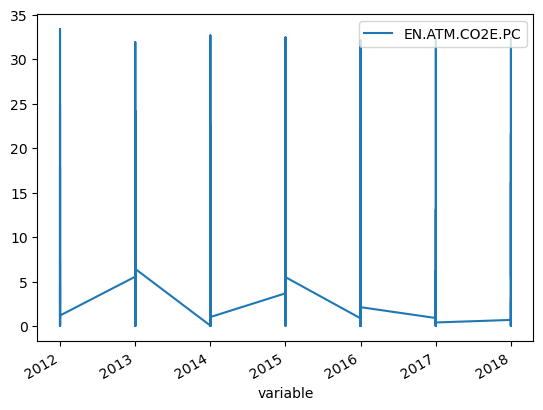

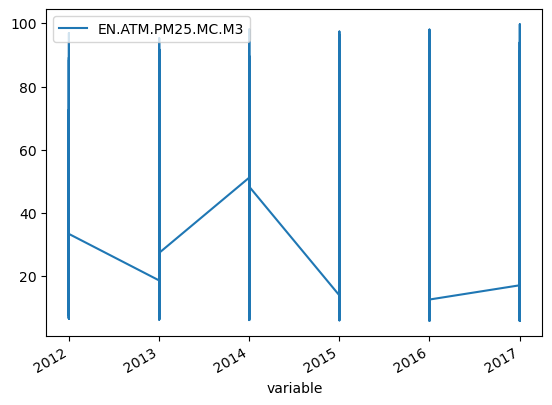

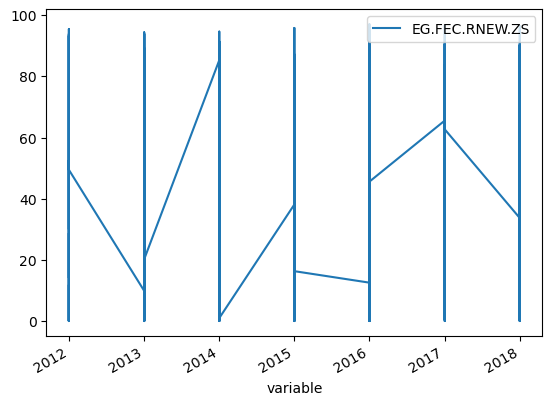

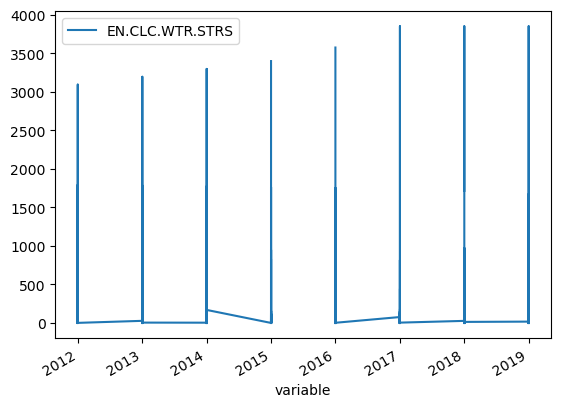

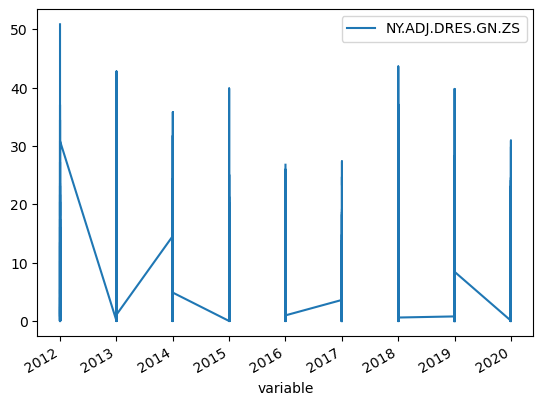

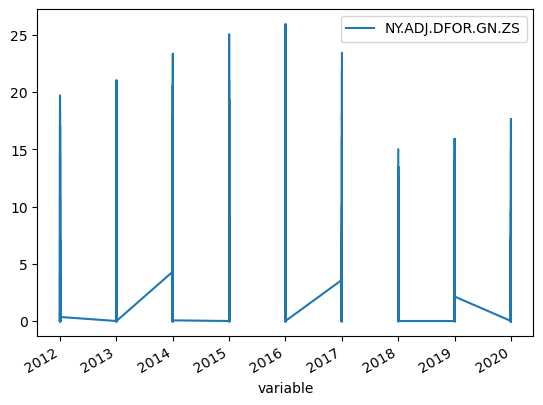

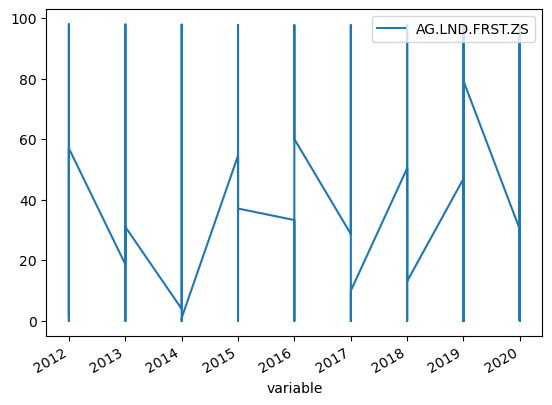

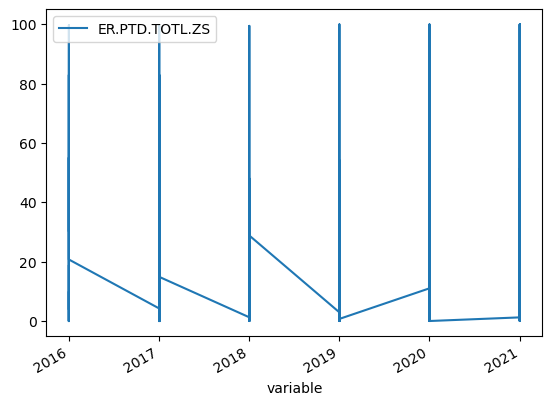

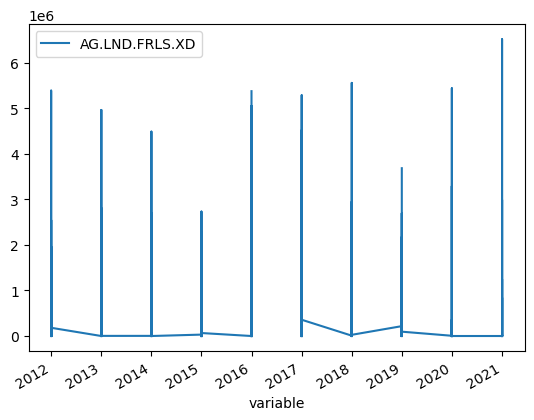

In [30]:
for i in env_ind:
    df_env_trans.plot(x='variable', y= i)

In [31]:
df_soc = df_esg[df_esg['ind'].isin(soc_ind)]

In [32]:
df_soc.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1176,AFG,EG.ELC.ACCS.ZS,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN
1177,AGO,EG.ELC.ACCS.ZS,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610,NaN
1178,ALB,EG.ELC.ACCS.ZS,99.900002,100.000000,99.949997,99.980003,99.889999,99.889999,100.000000,100.000000,100.000000,NaN
1179,AND,EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1180,ARE,EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [33]:
df_soc_trans = melt_pivot(df_soc)

In [34]:
df_soc_trans

ind,iso3,variable,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SH.H2O.SMDW.ZS,SL.UEM.TOTL.ZS,SN.ITK.DEFC.ZS,SP.DYN.LE00.IN
0,AFG,2012,69.099998,NaN,80.3,20.818832,11.341,28.2,62.054
1,AFG,2013,68.290649,14.102800,76.9,21.671018,11.193,26.3,62.525
2,AFG,2014,89.500000,14.465930,73.6,22.523437,11.142,24.2,62.966
3,AFG,2015,71.500000,12.509000,70.4,23.376206,11.127,21.5,63.377
4,AFG,2016,97.699997,13.091000,67.5,24.229208,11.158,22.2,63.763
...,...,...,...,...,...,...,...,...,...
1925,ZWE,2017,44.178635,20.874201,57.0,29.997683,4.785,NaN,60.812
1926,ZWE,2018,45.572647,19.039841,54.8,29.827913,4.796,NaN,61.195
1927,ZWE,2019,46.781475,NaN,54.2,29.673569,4.833,NaN,61.490
1928,ZWE,2020,52.747669,NaN,53.9,29.535890,5.351,NaN,61.738


In [35]:
df_soc_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso3               1930 non-null   object 
 1   variable           1930 non-null   object 
 2   EG.ELC.ACCS.ZS     1737 non-null   float64
 3   SE.XPD.TOTL.GB.ZS  1166 non-null   float64
 4   SH.DYN.MORT        1728 non-null   float64
 5   SH.H2O.SMDW.ZS     1032 non-null   float64
 6   SL.UEM.TOTL.ZS     1780 non-null   float64
 7   SN.ITK.DEFC.ZS     1256 non-null   float64
 8   SP.DYN.LE00.IN     1656 non-null   float64
dtypes: float64(7), object(2)
memory usage: 135.8+ KB


In [36]:
df_soc_trans['variable'] = pd.to_datetime(df_soc_trans['variable'], format="%Y", errors='coerce')

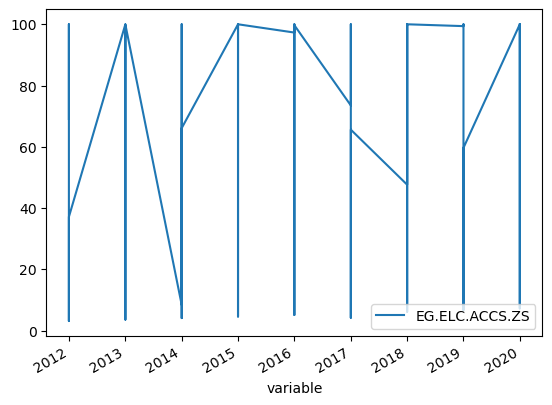

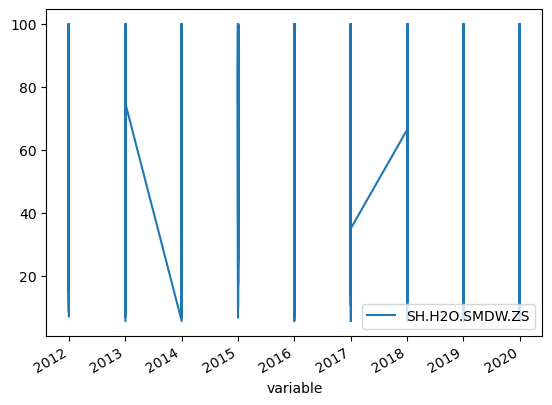

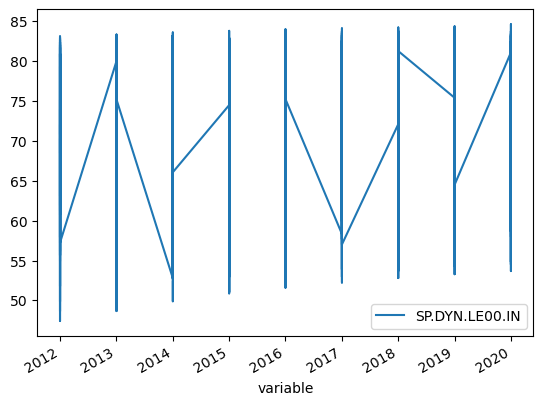

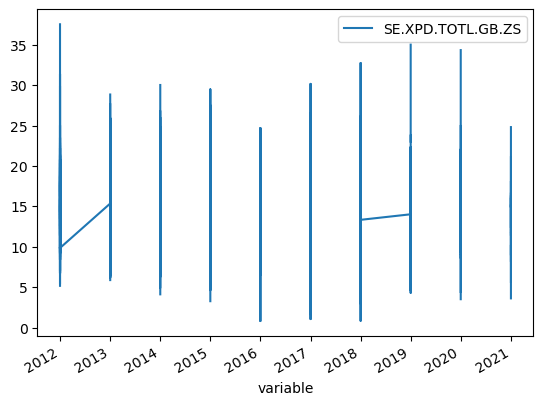

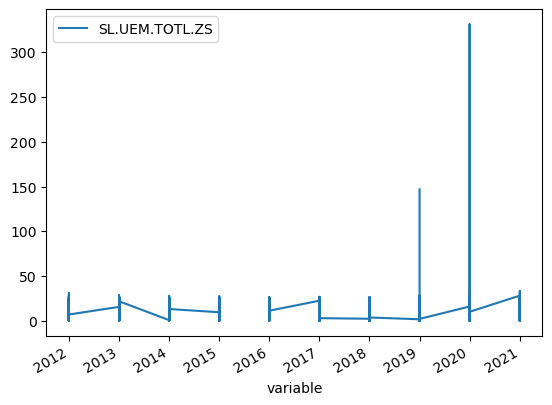

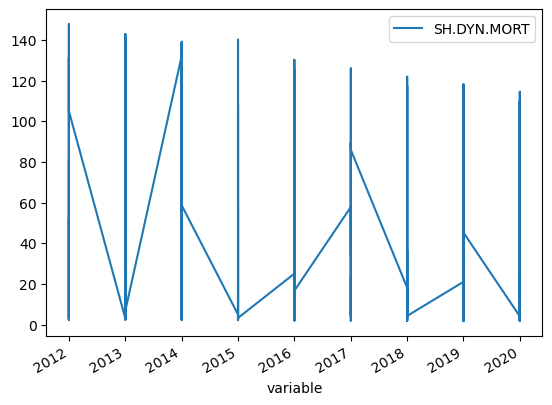

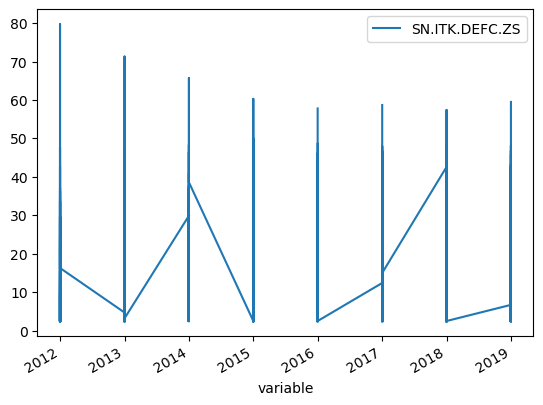

In [37]:
for i in soc_ind:
    df_soc_trans.plot(x='variable', y= i)

In [38]:
df_gov = df_esg[df_esg['ind'].isin(gov_ind)]

In [39]:
df_gov.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
580,AFG,CC.EST,-1.419741,-1.436510,-1.354829,-1.342216,-1.526172,-1.515626,-1.487624,-1.400733,-1.475405,NaN
581,AGO,CC.EST,-1.268470,-1.309463,-1.443944,-1.395014,-1.439528,-1.410953,-1.139192,-1.054451,-0.927093,NaN
583,ALB,CC.EST,-0.726491,-0.698432,-0.548164,-0.479035,-0.405149,-0.420722,-0.478632,-0.533089,-0.540196,NaN
584,AND,CC.EST,1.267989,1.260759,1.225432,1.218931,1.228804,1.245126,1.239041,1.234696,1.314374,NaN
586,ARE,CC.EST,1.163153,1.280802,1.203786,1.072319,1.171737,1.136438,1.152078,1.106673,1.114396,NaN


In [40]:
df_gov_trans = melt_pivot(df_gov)

In [41]:
df_gov_trans

ind,iso3,variable,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,SE.ENR.PRSC.FM.ZS,VA.EST
0,AFG,2012,-1.419741,5.454545,-2.418561,-1.643081,0.66925,-1.267430
1,AFG,2013,-1.436510,5.900000,-2.519349,-1.597348,0.65533,-1.240068
2,AFG,2014,-1.354829,7.000000,-2.411068,-1.445761,0.65402,-1.135445
3,AFG,2015,-1.342216,8.260000,-2.571222,-1.504086,0.64233,-1.117563
4,AFG,2016,-1.526172,11.000000,-2.671054,-1.498478,0.64567,-1.037838
...,...,...,...,...,...,...,...,...
1925,ZWE,2017,-1.271278,24.400000,-0.708769,-1.373646,NaN,-1.195013
1926,ZWE,2018,-1.230871,25.000000,-0.722774,-1.272543,NaN,-1.140979
1927,ZWE,2019,-1.236825,25.100000,-0.959749,-1.257262,NaN,-1.159892
1928,ZWE,2020,-1.253140,29.300000,-1.080208,-1.274851,NaN,-1.121479


In [42]:
df_gov_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso3               1930 non-null   object 
 1   variable           1930 non-null   object 
 2   CC.EST             1719 non-null   float64
 3   IT.NET.USER.ZS     1586 non-null   float64
 4   PV.EST             1737 non-null   float64
 5   RL.EST             1723 non-null   float64
 6   SE.ENR.PRSC.FM.ZS  1024 non-null   float64
 7   VA.EST             1737 non-null   float64
dtypes: float64(6), object(2)
memory usage: 120.8+ KB


In [43]:
df_gov_trans['variable'] = pd.to_datetime(df_gov_trans['variable'], format="%Y", errors='coerce')

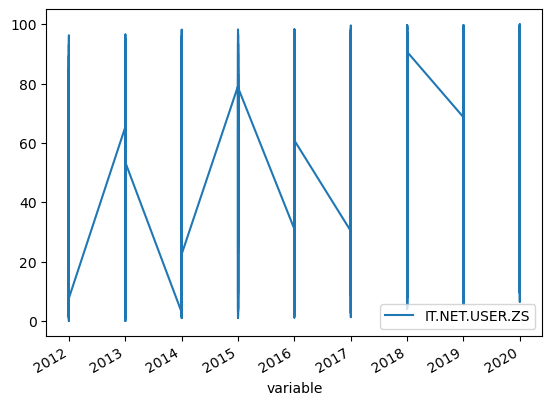

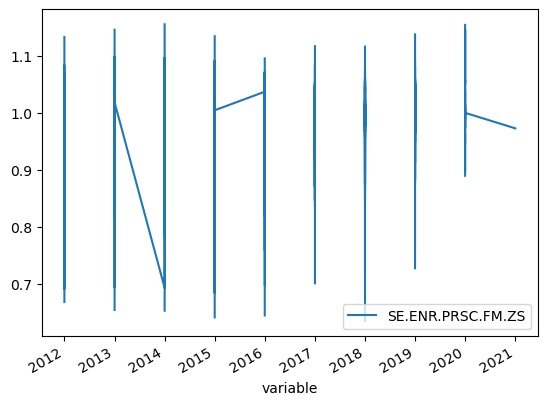

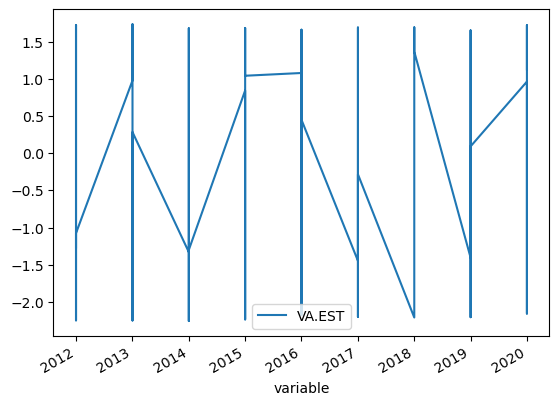

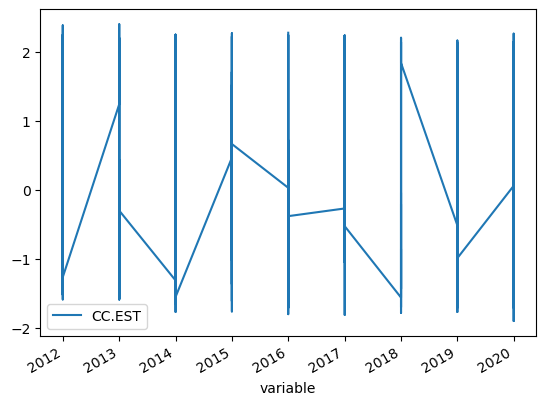

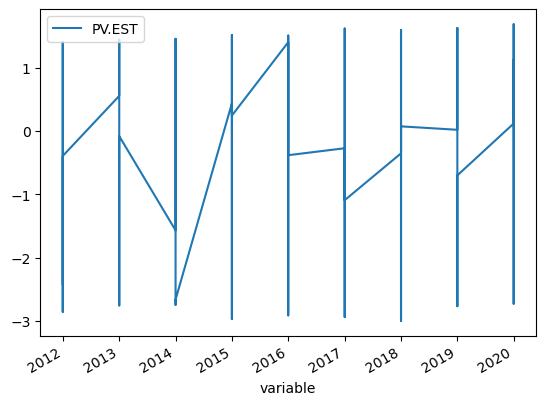

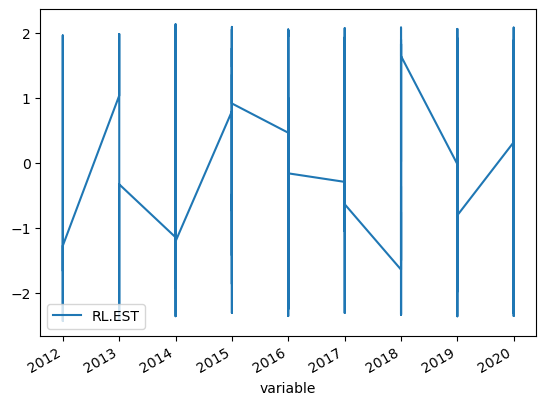

In [44]:
for i in gov_ind:
    df_gov_trans.plot(x='variable', y= i)

## Handling Missing Values

**LINEAR REGRESSION FOR ENVIRONMENT**

Ich möchte eine lineare Regression anwenden um die NaN in den u.g. Spalten zu befüllen die NaN treten bei bestimmten Ausrägungen der splate "variable" auf. "variable" enthält die "Jahre" anhand deren dann auch die Werte linear ermittelt werden sollen. zuerst für jeden einzelnen iso3-Wert (jeweils ein Land) und für jede einzelne Spalte ab EG.ELC.ACCS.ZS. Also EG.ELC.ACCS.ZS, SE.XPD.TOTL.GB.ZS, SE.XPD.TOTL.GB.ZS, SH.H2O.SMDW.ZS, SL.UEM.TOTL.ZS, SN.ITK.DEFC.ZS, SP.DYN.LE00.IN
Die Werte die für die linearen regression verwendet werden sollen die nicht-NaN_werte der jeweiligen Spalte sein

In [45]:
#copy the df
df_env_inp = df_env_trans.copy()

In [46]:
df_env_inp = interpol(df_env_inp, env_ind)

In [47]:
df_env_lin_reg = lin_reg(df_env_inp, env_ind)

In [48]:
per_null(df_env_trans)

ind
iso3                  0.000000
variable              0.000000
AG.LND.FRLS.XD        2.590674
AG.LND.FRST.ZS       10.207254
EG.FEC.RNEW.ZS       30.725389
EN.ATM.CO2E.PC       30.725389
EN.ATM.PM25.MC.M3    42.176166
EN.CLC.WTR.STRS      27.046632
ER.PTD.TOTL.ZS       40.880829
NY.ADJ.DFOR.GN.ZS    17.616580
NY.ADJ.DRES.GN.ZS    18.134715
dtype: float64


In [49]:
per_null(df_env_inp)

ind
iso3                 0.000000
variable             0.000000
AG.LND.FRLS.XD       2.590674
AG.LND.FRST.ZS       0.000000
EG.FEC.RNEW.ZS       1.036269
EN.ATM.CO2E.PC       1.036269
EN.ATM.PM25.MC.M3    3.626943
EN.CLC.WTR.STRS      8.808290
ER.PTD.TOTL.ZS       1.036269
NY.ADJ.DFOR.GN.ZS    6.735751
NY.ADJ.DRES.GN.ZS    7.253886
dtype: float64


In [50]:
per_null(df_env_lin_reg)

ind
iso3                 0.000000
variable             0.000000
AG.LND.FRLS.XD       2.590674
AG.LND.FRST.ZS       0.000000
EG.FEC.RNEW.ZS       1.036269
EN.ATM.CO2E.PC       1.036269
EN.ATM.PM25.MC.M3    3.626943
EN.CLC.WTR.STRS      8.808290
ER.PTD.TOTL.ZS       1.036269
NY.ADJ.DFOR.GN.ZS    6.735751
NY.ADJ.DRES.GN.ZS    7.253886
dtype: float64


In [51]:
df_env_inp.head(5)

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012-01-01,39.0,1.850994,14.404900,0.335351,66.023174,54.757019,0.104707,0.213735,0.386704
1,AFG,2013-01-01,1.0,1.850994,17.105000,0.263716,61.366745,54.757019,0.104707,0.213750,0.289482
2,AFG,2014-01-01,3.0,1.850994,20.770300,0.234037,59.010330,54.757019,0.104707,0.217130,0.288231
3,AFG,2015-01-01,0.0,1.850994,20.273800,0.232176,61.252656,54.757019,0.104707,0.243272,0.295242
4,AFG,2016-01-01,0.0,1.850994,24.740299,0.208857,56.287047,54.757019,0.104707,0.283257,0.355951


**DATA IMPUTATION FOR SOCIAL**

In [52]:
df_soc_inp = df_soc_trans.copy()

In [53]:
#interpolation
df_soc_inp = interpol(df_soc_inp, soc_ind)

In [54]:
per_null(df_soc_trans)

ind
iso3                  0.000000
variable              0.000000
EG.ELC.ACCS.ZS       10.000000
SE.XPD.TOTL.GB.ZS    39.585492
SH.DYN.MORT          10.466321
SH.H2O.SMDW.ZS       46.528497
SL.UEM.TOTL.ZS        7.772021
SN.ITK.DEFC.ZS       34.922280
SP.DYN.LE00.IN       14.196891
dtype: float64


In [55]:
per_null(df_soc_inp)

ind
iso3                  0.000000
variable              0.000000
EG.ELC.ACCS.ZS        0.000000
SE.XPD.TOTL.GB.ZS    10.880829
SH.DYN.MORT           0.518135
SH.H2O.SMDW.ZS       40.414508
SL.UEM.TOTL.ZS        7.772021
SN.ITK.DEFC.ZS       18.652850
SP.DYN.LE00.IN        4.663212
dtype: float64


**DATA IMPUTATION FOR GOVERMERNT**

In [56]:
df_gov_inp = df_gov_trans.copy()

In [57]:
df_gov_inp = interpol(df_gov_inp, gov_ind)

In [58]:
per_null(df_gov_trans)

ind
iso3                  0.000000
variable              0.000000
CC.EST               10.932642
IT.NET.USER.ZS       17.823834
PV.EST               10.000000
RL.EST               10.725389
SE.ENR.PRSC.FM.ZS    46.943005
VA.EST               10.000000
dtype: float64


In [59]:
per_null(df_gov_inp)

ind
iso3                  0.000000
variable              0.000000
CC.EST                1.036269
IT.NET.USER.ZS        0.518135
PV.EST                0.000000
RL.EST                0.000000
SE.ENR.PRSC.FM.ZS    14.507772
VA.EST                0.000000
dtype: float64


In [60]:
empty_columns_gov = nan_scanner_comb(df_env_inp)
empty_columns_gov

,iso3,Spalte
0,AND,EN.CLC.WTR.STRS
1,AND,NY.ADJ.DFOR.GN.ZS
2,AND,NY.ADJ.DRES.GN.ZS
3,ATG,NY.ADJ.DFOR.GN.ZS
4,ATG,NY.ADJ.DRES.GN.ZS
...,...,...
57,TUV,NY.ADJ.DRES.GN.ZS
58,VUT,EN.CLC.WTR.STRS
59,WSM,AG.LND.FRLS.XD
60,WSM,EN.CLC.WTR.STRS


## FEATURE ENGINEERING

### ANALYSIS FOR SCALING

In [61]:
df_soc_inp.describe()

ind,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SH.H2O.SMDW.ZS,SL.UEM.TOTL.ZS,SN.ITK.DEFC.ZS,SP.DYN.LE00.IN
count,1930.000000,1720.000000,1920.000000,1150.000000,1780.000000,1570.000000,1840.000000
mean,82.772327,14.318561,30.146615,70.429891,8.213578,10.204522,71.746863
std,26.742118,5.138568,30.703990,30.461305,10.263936,11.277223,7.793333
min,3.136361,0.833360,1.800000,5.564839,0.100000,2.500000,47.416000
25%,69.778690,10.727700,6.900000,46.137474,3.810000,2.500000,66.378250
50%,99.477089,13.541540,17.300000,82.498756,6.038000,5.600000,73.121256
75%,100.000000,17.313990,45.350000,97.760062,10.334750,12.975000,77.195000
max,100.000000,37.520962,147.800000,100.000003,331.000000,79.700000,84.615610


In [62]:
df_env_inp.describe()

ind,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
count,1.880000e+03,1930.000000,1910.000000,1910.000000,1860.000000,1760.000000,1910.000000,1800.000000,1790.000000
mean,1.309917e+05,32.585135,31.953636,4.228765,27.866122,68.199025,12.538626,1.239740,3.929416
std,5.139052e+05,24.141679,28.191510,4.931345,18.300555,312.392514,14.070240,3.279496,6.354719
min,0.000000e+00,0.000000,0.000000,0.026146,5.861331,0.027446,0.008594,0.000000,0.000000
25%,3.475000e+01,11.325134,8.926425,0.709209,14.939553,3.606240,2.486653,0.000000,0.134481
50%,5.017500e+03,31.140856,23.723301,2.539994,22.640408,10.192868,8.913486,0.003999,0.963959
75%,6.368225e+04,50.404562,51.063827,5.973405,35.673442,35.457627,17.899842,0.459386,5.279739
max,6.518852e+06,97.952462,97.031097,33.373132,99.734374,3850.500000,100.000000,25.950151,50.828819


In [63]:
df_gov_inp.describe()

ind,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,SE.ENR.PRSC.FM.ZS,VA.EST
count,1910.000000,1920.000000,1930.000000,1930.000000,1650.000000,1930.000000
mean,-0.078401,49.810738,-0.074977,-0.075548,0.984692,-0.047444
std,0.994426,29.559712,0.981749,0.984410,0.071052,1.001600
min,-1.905176,0.000000,-3.005906,-2.423256,0.636020,-2.259159
25%,-0.805007,22.688780,-0.661096,-0.782731,0.976315,-0.874338
50%,-0.303716,51.142710,0.004832,-0.221438,0.998260,0.020665
75%,0.565775,76.024694,0.761544,0.578239,1.018443,0.833626
max,2.406791,100.000000,1.698112,2.129668,1.154940,1.737975


### SCALING

In [64]:
df_test_env = df_env_inp.copy()

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Select the columns to be scaled
columns_to_scale = env_ind

# Fill missing values with a constant value (e.g., -9999) that will be ignored during scaling
df_test_env[columns_to_scale] = df_test_env[columns_to_scale].fillna(-9999)

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
df_test_env[columns_to_scale] = scaler.fit_transform(df_test_env[columns_to_scale])

In [67]:
df_env_inp

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012-01-01,39.0,1.850994,14.404900,0.335351,66.023174,54.757019,0.104707,0.213735,0.386704
1,AFG,2013-01-01,1.0,1.850994,17.105000,0.263716,61.366745,54.757019,0.104707,0.213750,0.289482
2,AFG,2014-01-01,3.0,1.850994,20.770300,0.234037,59.010330,54.757019,0.104707,0.217130,0.288231
3,AFG,2015-01-01,0.0,1.850994,20.273800,0.232176,61.252656,54.757019,0.104707,0.243272,0.295242
4,AFG,2016-01-01,0.0,1.850994,24.740299,0.208857,56.287047,54.757019,0.104707,0.283257,0.355951
...,...,...,...,...,...,...,...,...,...,...,...
1925,ZWE,2017-01-01,NaN,45.451183,83.492996,0.718570,22.251671,31.346226,27.214585,3.803166,5.279814
1926,ZWE,2018-01-01,NaN,45.332093,81.363602,0.849793,22.251671,35.405370,27.214585,2.268352,4.963371
1927,ZWE,2019-01-01,NaN,45.213002,81.363602,0.849793,22.251671,35.405370,27.214746,2.311873,2.788616
1928,ZWE,2020-01-01,NaN,45.093912,81.363602,0.849793,22.251671,35.405370,27.214746,2.723468,9.603228


In [68]:
df_test_env

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012-01-01,0.001537,0.018897,0.991816,0.996707,0.996662,0.725929,0.990108,0.997433,0.994981
1,AFG,2013-01-01,0.001532,0.018897,0.992083,0.996700,0.996201,0.725929,0.990108,0.997433,0.994971
2,AFG,2014-01-01,0.001532,0.018897,0.992446,0.996697,0.995967,0.725929,0.990108,0.997433,0.994971
3,AFG,2015-01-01,0.001532,0.018897,0.992397,0.996697,0.996189,0.725929,0.990108,0.997436,0.994972
4,AFG,2016-01-01,0.001532,0.018897,0.992840,0.996694,0.995698,0.725929,0.990108,0.997440,0.994978
...,...,...,...,...,...,...,...,...,...,...,...
1925,ZWE,2017-01-01,0.000000,0.464013,0.998659,0.996745,0.992327,0.724239,0.992793,0.997791,0.995468
1926,ZWE,2018-01-01,0.000000,0.462797,0.998448,0.996758,0.992327,0.724532,0.992793,0.997638,0.995436
1927,ZWE,2019-01-01,0.000000,0.461581,0.998448,0.996758,0.992327,0.724532,0.992793,0.997642,0.995220
1928,ZWE,2020-01-01,0.000000,0.460365,0.998448,0.996758,0.992327,0.724532,0.992793,0.997683,0.995898


## SCORING

In [69]:
#choose the columns with a negativ relation
columns_recip = ['EN.ATM.CO2E.PC', 'EN.ATM.PM25.MC.M3', 'EN.CLC.WTR.STRS', 'AG.LND.FRLS.XD']
#transform the values in reciproce
df_test_env [columns_recip] = 1-df_test_env [columns_recip]

In [70]:
# Calculate the score by summing the scaled values
df_test_env['score'] = df_test_env[columns_to_scale].sum(axis=1)

# Print the DataFrame with the score column
df_test_env

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS,score
0,AFG,2012-01-01,0.998463,0.018897,0.991816,0.003293,0.003338,0.274071,0.990108,0.997433,0.994981,5.272399
1,AFG,2013-01-01,0.998468,0.018897,0.992083,0.003300,0.003799,0.274071,0.990108,0.997433,0.994971,5.273131
2,AFG,2014-01-01,0.998468,0.018897,0.992446,0.003303,0.004033,0.274071,0.990108,0.997433,0.994971,5.273730
3,AFG,2015-01-01,0.998468,0.018897,0.992397,0.003303,0.003811,0.274071,0.990108,0.997436,0.994972,5.273463
4,AFG,2016-01-01,0.998468,0.018897,0.992840,0.003306,0.004302,0.274071,0.990108,0.997440,0.994978,5.274410
...,...,...,...,...,...,...,...,...,...,...,...,...
1925,ZWE,2017-01-01,1.000000,0.464013,0.998659,0.003255,0.007673,0.275761,0.992793,0.997791,0.995468,5.735412
1926,ZWE,2018-01-01,1.000000,0.462797,0.998448,0.003242,0.007673,0.275468,0.992793,0.997638,0.995436,5.733494
1927,ZWE,2019-01-01,1.000000,0.461581,0.998448,0.003242,0.007673,0.275468,0.992793,0.997642,0.995220,5.732066
1928,ZWE,2020-01-01,1.000000,0.460365,0.998448,0.003242,0.007673,0.275468,0.992793,0.997683,0.995898,5.731570


In [71]:
df_test_env[df_test_env['iso3'] == 'DEU']

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS,score
440,DEU,2012-01-01,0.994485,0.334297,0.991740,0.002385,0.008531,0.275265,0.993933,0.997411,0.994950,5.592997
441,DEU,2013-01-01,0.996095,0.334029,0.991739,0.002365,0.008570,0.275518,0.993933,0.997411,0.994948,5.594608
442,DEU,2014-01-01,0.995226,0.334069,0.991778,0.002419,0.008613,0.275547,0.993933,0.997411,0.994946,5.593943
443,DEU,2015-01-01,0.996488,0.334165,0.991830,0.002421,0.008606,0.275576,0.993933,0.997411,0.994945,5.595376
444,DEU,2016-01-01,0.994352,0.333687,0.991800,0.002422,0.008694,0.275605,0.993933,0.997411,0.994944,5.592848
445,DEU,2017-01-01,0.993414,0.333678,0.991896,0.002444,0.008685,0.275605,0.993939,0.997411,0.994945,5.592017
446,DEU,2018-01-01,0.990468,0.333668,0.991954,0.002473,0.008685,0.275605,0.993939,0.997411,0.994945,5.589148
447,DEU,2019-01-01,0.981891,0.333668,0.991954,0.002473,0.008685,0.275605,0.993907,0.997411,0.994947,5.580542
448,DEU,2020-01-01,0.969836,0.333668,0.991954,0.002473,0.008685,0.275605,0.993943,0.997411,0.994951,5.568527
449,DEU,2021-01-01,0.967486,0.333668,0.991954,0.002473,0.008685,0.275605,0.993914,0.997411,0.994951,5.566148


In [72]:
df_env_inp[df_test_env['iso3'] == 'USA']

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS
1820,USA,2012-01-01,1964094.0,33.809533,8.7281,15.771145,9.003163,27.188748,26.326200,0.0,0.384359
1821,USA,2013-01-01,1736445.0,33.839596,9.0833,16.102958,8.734777,27.513160,26.326200,0.0,0.405632
1822,USA,2014-01-01,1736527.0,33.869659,9.2205,16.026379,8.220720,27.837572,26.326200,0.0,0.346000
1823,USA,2015-01-01,2289649.0,33.899723,9.0339,15.535342,8.063920,28.161984,26.326200,0.0,0.045414
1824,USA,2016-01-01,2264067.0,33.899723,9.4563,15.131747,7.406464,28.161984,26.326200,0.0,0.114015
1825,USA,2017-01-01,2311358.0,33.866926,9.9191,14.805882,7.409442,28.161984,26.328084,0.0,0.190560
1826,USA,2018-01-01,2092359.0,33.866926,10.1072,15.240875,7.409442,28.161984,26.328084,0.0,0.372953
1827,USA,2019-01-01,2109918.0,33.866926,10.1072,15.240875,7.409442,28.161984,26.328115,0.0,0.336831
1828,USA,2020-01-01,1966716.0,33.866926,10.1072,15.240875,7.409442,28.161984,23.945835,0.0,0.239573
1829,USA,2021-01-01,2044299.0,33.866926,10.1072,15.240875,7.409442,28.161984,15.883274,0.0,0.239573


In [73]:
df_test_env[df_test_env['iso3'] == 'USA']

ind,iso3,variable,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS,score
1820,USA,2012-01-01,0.697635,0.345163,0.991254,0.001755,0.008984,0.276061,0.992705,0.997411,0.994981,5.305949
1821,USA,2013-01-01,0.732504,0.345470,0.991289,0.001721,0.009011,0.276038,0.992705,0.997411,0.994983,5.341131
1822,USA,2014-01-01,0.732491,0.345777,0.991302,0.001729,0.009062,0.276014,0.992705,0.997411,0.994977,5.341469
1823,USA,2015-01-01,0.647771,0.346083,0.991284,0.001778,0.009077,0.275991,0.992705,0.997411,0.994947,5.257048
1824,USA,2016-01-01,0.651690,0.346083,0.991326,0.001818,0.009143,0.275991,0.992705,0.997411,0.994954,5.261121
1825,USA,2017-01-01,0.644446,0.345749,0.991372,0.001851,0.009142,0.275991,0.992705,0.997411,0.994961,5.253628
1826,USA,2018-01-01,0.677990,0.345749,0.991390,0.001807,0.009142,0.275991,0.992705,0.997411,0.994979,5.287165
1827,USA,2019-01-01,0.675300,0.345749,0.991390,0.001807,0.009142,0.275991,0.992705,0.997411,0.994976,5.284472
1828,USA,2020-01-01,0.697234,0.345749,0.991390,0.001807,0.009142,0.275991,0.992469,0.997411,0.994966,5.306160
1829,USA,2021-01-01,0.685351,0.345749,0.991390,0.001807,0.009142,0.275991,0.991671,0.997411,0.994966,5.293479


In [74]:
df_test_env.describe()

ind,AG.LND.FRLS.XD,AG.LND.FRST.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DRES.GN.ZS,score
count,1930.000000,1930.000000,1930.000000,1930.000000,1.930000e+03,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,0.978964,0.332663,0.983258,0.013238,4.312788e-02,0.337128,0.981067,0.930344,0.923133,5.522922
std,0.077762,0.246463,0.100680,0.101002,1.856859e-01,0.207191,0.100427,0.250087,0.258235,0.502702
min,0.000000,0.000000,0.000000,0.000000,1.110223e-16,0.000000,0.000000,0.000000,0.000000,3.273641
25%,0.989328,0.115619,0.991199,0.002734,6.438516e-03,0.275738,0.990330,0.997411,0.994948,5.348660
50%,0.997835,0.317918,0.992710,0.003076,7.674292e-03,0.277443,0.990948,0.997411,0.995021,5.555214
75%,0.998465,0.514582,0.995371,0.003258,8.507015e-03,0.277865,0.991869,0.997445,0.995402,5.743874
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,6.922936
